In [2]:
!pip install xgboost

In [34]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("Advertising.csv")
data.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [27]:
x = data.drop(columns = ["Unnamed: 0", "sales"])
y = data["sales"]

x["TV*radio"] = x["radio"]*x["TV"]
x["TV*newspaper"] = x["TV"]*x["newspaper"]
x["newspaper*radio"] = x["newspaper"]*x["radio"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, random_state=42)

model = XGBRegressor(random_state = 42, n_estimators = 10, max_depth = 10, max_leaves = 10)

In [28]:
XGBR = model.fit(X_train, y_train)

y_pred_test = XGBR.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)

y_pred_train = XGBR.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
r2_test, r2_train

(0.9822521580151204, 0.9943305753975434)

In [29]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

model = XGBRegressor(random_state=42)

search_space = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(3, 15),
    'max_leaves': Integer(3, 15),
}

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=50,
    scoring='r2',
    cv=3,
    random_state=2,
    verbose=1,
    n_jobs=-1
)

opt.fit(X_train, y_train)

best_model = opt.best_estimator_

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

r2_scores_cv = opt.cv_results_['mean_test_score']
r2_var = np.var(r2_scores_cv)

print("Mejores hiperparámetros encontrados:")
for param, value in opt.best_params_.items():
    print(f"  - {param}: {value}")

print(f"\nR2 final en test: {r2_test:.4f}")
print(f"Varianza del R2 (en CV): {r2_var:.6f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [36]:
x = data.drop(columns = ["Unnamed: 0", "sales"])
y = data["sales"]

x["TV*radio"] = x["radio"]*x["TV"]
x["TV*newspaper"] = x["TV"]*x["newspaper"]
x["newspaper*radio"] = x["newspaper"]*x["radio"]

model = XGBRegressor(random_state=42)
model.fit(x, y)
y_pred = model.predict(x)

W = y_pred - y

In [38]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept = True)

W = np.reshape(W, [-1, 1])
y_pred = np.reshape(y_pred, [-1, 1])

linreg.fit(y_pred, W)

linreg_pred = linreg.predict(y_pred)

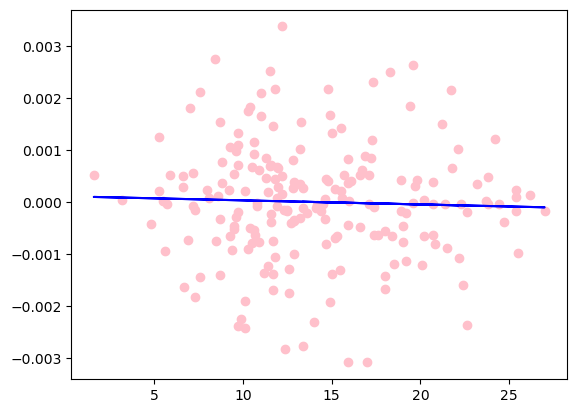

In [40]:
plt.scatter(y_pred, W, c = "pink")
plt.plot(y_pred, linreg_pred, c = "blue")

In [41]:
import statsmodels.api as sm
x = sm.add_constant(W)
ols = sm.OLS(y_pred, W)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                            0.02607
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                       0.872
Time:                        17:44:29   Log-Likelihood:                         -824.81
No. Observations:                 200   AIC:                                      1652.
Df Residuals:                     199   BIC:                                      1655.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -152.0388    941.571     -0.161      0.872   -2008.777    1704.699
==============================================================================
Omnibus:                        7.396   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.033
Skew:                           0.406   Prob(JB):                       0.0297
Kurtosis:                       2.570   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""